# GRADUATE REPORT ANALYSIS

## Goal: To Provide a 'Guide' for prospective students looking for answers on th following questions
### 1) Which Major to study based on how Much they can earn
### 2) Which Major to Avoid for Fear of Unemployment
### 3) Which majors are best for Part time work

In [1]:
#import necessary libraries
import sqlite3
import numpy as np
import pandas as pd

In [2]:
#Create helper functions
db = 'jobs.db'
def run_query(q):
    with sqlite3.connect(db) as conn:
        return pd.read_sql(q, conn)
    
def show_table():
    q = '''SELECT name,
                  type
            FROM sqlite_master
            WHERE type IN ('table', 'view')
            '''
    return run_query(q)

def run_command(c):
    with sqlite3.connect(db) as conn:
        conn.isolation_level = None
        conn.execute(c)
        return pd.read_sql(c, conn)
        
def fetch_every(q):
    with sqlite3.connect(db) as conn:
        cursor = conn.cursor()
        return cursor.execute(q).fetchall()

In [3]:
#See what is in the database
q1 = 'SELECT * FROM sqlite_master'
run_command(q1)

,type,name,tbl_name,rootpage,sql
0,table,recent_grads,recent_grads,2,"CREATE TABLE ""recent_grads"" (\n""index"" INTEGER..."
1,index,ix_recent_grads_index,recent_grads,3,"CREATE INDEX ""ix_recent_grads_index""ON ""recent..."


In [4]:
q2 = 'SELECT * FROM sqlite_master WHERE type = "table";'
fetch_every(q2)

[('table',
  'recent_grads',
  'recent_grads',
  2,
  'CREATE TABLE "recent_grads" (\n"index" INTEGER,\n  "Rank" INTEGER,\n  "Major_code" INTEGER,\n  "Major" TEXT,\n  "Major_category" TEXT,\n  "Total" INTEGER,\n  "Sample_size" INTEGER,\n  "Men" INTEGER,\n  "Women" INTEGER,\n  "ShareWomen" REAL,\n  "Employed" INTEGER,\n  "Full_time" INTEGER,\n  "Part_time" INTEGER,\n  "Full_time_year_round" INTEGER,\n  "Unemployed" INTEGER,\n  "Unemployment_rate" REAL,\n  "Median" INTEGER,\n  "P25th" INTEGER,\n  "P75th" INTEGER,\n  "College_jobs" INTEGER,\n  "Non_college_jobs" INTEGER,\n  "Low_wage_jobs" INTEGER\n)')]

In [5]:
#Familiarize with the dataset
q3 = 'SELECT * FROM recent_grads'
run_query(q3)

,index,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,4,5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,5,6,2418,NUCLEAR ENGINEERING,Engineering,2573,17,2200,373,0.144967,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,6,7,6202,ACTUARIAL SCIENCE,Business,3777,51,832,960,0.535714,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,7,8,5001,ASTRONOMY AND ASTROPHYSICS,Physical Sciences,1792,10,2110,1667,0.441356,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,8,9,2414,MECHANICAL ENGINEERING,Engineering,91227,1029,12953,2105,0.139793,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,9,10,2408,ELECTRICAL ENGINEERING,Engineering,81527,631,8407,6548,0.437847,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


__The above dataset is a compiled data showing various information concerning different department and faculties from various institions highlighting their median salary, number of men and women, number of unemployed graduates, number of part time workers and so on__

In [6]:
#Store the data in a pandas dataframe and view all the columns
data = run_query(q3)
data.columns

Index(['index', 'Rank', 'Major_code', 'Major', 'Major_category', 'Total',
       'Sample_size', 'Men', 'Women', 'ShareWomen', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [7]:
#Count the number of majors in each category
q4 = """SELECT COUNT(major) frequency,
               major_category
        FROM recent_grads
        GROUP BY major_category
        ORDER BY frequency DESC
            """
run_query(q4)

,frequency,Major_category
0,29,Engineering
1,16,Education
2,15,Humanities & Liberal Arts
3,14,Biology & Life Science
4,13,Business
5,12,Health
6,11,Computers & Mathematics
7,10,Agriculture & Natural Resources
8,10,Physical Sciences
9,9,Psychology & Social Work


In [8]:
#A Query to check which major category has the highest number of graduates
q5 = '''SELECT SUM(total) total_category,
               SUM(sample_size) total_sample,
                Major_Category 
        FROM recent_grads 
        GROUP BY Major_category 
        ORDER BY total_category DESC
        '''
run_query(q5)

,total_category,total_sample,Major_category
0,1302376,15505,Business
1,713468,5340,Humanities & Liberal Arts
2,559129,4742,Education
3,537583,4926,Engineering
4,529966,4581,Social Science
5,481007,3180,Psychology & Social Work
6,463230,3914,Health
7,453862,2317,Biology & Life Science
8,392601,4508,Communications & Journalism
9,357130,3260,Arts


In [9]:
data.iloc[:,:9].head(10)

,index,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women
0,0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282
1,1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77
2,2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131
3,3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135
4,4,5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021
5,5,6,2418,NUCLEAR ENGINEERING,Engineering,2573,17,2200,373
6,6,7,6202,ACTUARIAL SCIENCE,Business,3777,51,832,960
7,7,8,5001,ASTRONOMY AND ASTROPHYSICS,Physical Sciences,1792,10,2110,1667
8,8,9,2414,MECHANICAL ENGINEERING,Engineering,91227,1029,12953,2105
9,9,10,2408,ELECTRICAL ENGINEERING,Engineering,81527,631,8407,6548


__From inspection, we see that for id 6, 'ACTUARIAL SCIENCE' Major, that the sum of the Men and Women column is not equal to the Total column. This is an issue as it throws into doubt the accuracy of the previous query we wrote. I will take a deeper look to see if this occurrence is rare.__

In [10]:
data['men_women'] = data['Men'] + data['Women']
data.pivot_table(values = 'men_women', index = 'Major_category', aggfunc=np.sum).sort_values(by='men_women', ascending = False)

,men_women
Major_category,
Biology & Life Science,1005935
Social Science,966973
Education,870670
Psychology & Social Work,740509
Engineering,518695
Humanities & Liberal Arts,509581
Agriculture & Natural Resources,447687
Physical Sciences,429875
Health,406656


__We see a different result as opposed to the query we wrote above__

In [11]:
data['equal'] = data['Total'] == data['men_women']
data['equal'].value_counts(dropna = False)

False    123
True      50
Name: equal, dtype: int64

__The result of our enquiry shows there are more values where these columns do not tally. In fact, they outweigh the rows where they tally. Hence in making future calculations, we will ignore the 'Total' column, rather sum the 'Men' and 'Women' columns myself__

In [12]:
data.columns

Index(['index', 'Rank', 'Major_code', 'Major', 'Major_category', 'Total',
       'Sample_size', 'Men', 'Women', 'ShareWomen', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs', 'men_women', 'equal'],
      dtype='object')

In [13]:
#Remove the added columns
del data['equal']
del data['men_women']

In [14]:
#confirm if removed
data.columns

Index(['index', 'Rank', 'Major_code', 'Major', 'Major_category', 'Total',
       'Sample_size', 'Men', 'Women', 'ShareWomen', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [15]:
#which major category makes the HIGHEST AVERAGE income based on the median column
q6 = '''SELECT major_category,
               SUM(Median) Sum_Median_Salary,
               COUNT(major) frequency,
               CAST(AVG(median) AS INT) Average_Median_Salary
        FROM recent_grads
        GROUP BY major_category
        ORDER BY Average_Median_Salary DESC
        '''
run_query(q6)

,Major_category,Sum_Median_Salary,frequency,Average_Median_Salary
0,Engineering,1664100,29,57382
1,Business,566000,13,43538
2,Computers & Mathematics,470200,11,42745
3,Law & Public Policy,211000,5,42200
4,Physical Sciences,418900,10,41890
5,Social Science,336100,9,37344
6,Agriculture & Natural Resources,369000,10,36900
7,Health,441900,12,36825
8,Biology & Life Science,509900,14,36421
9,Industrial Arts & Consumer Services,254400,7,36342


In [16]:
#import a library to aid in Visualizing the result
import matplotlib.pyplot as plt
%matplotlib inline

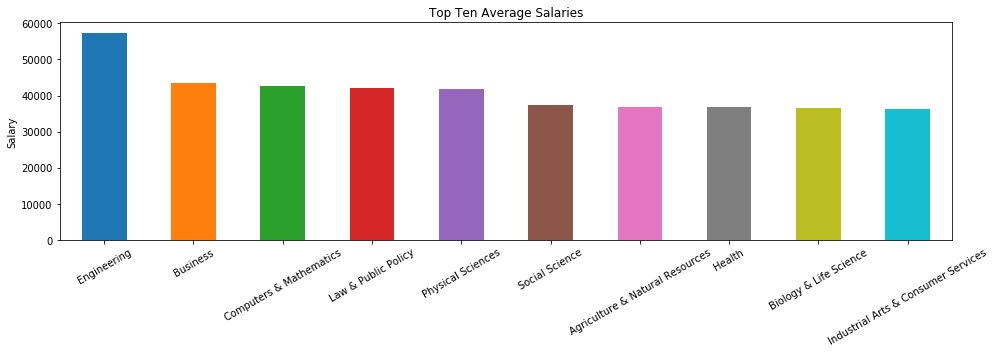

In [17]:
q7 = '''SELECT major_category,
               SUM(Median) Sum_Median_Salary,
               COUNT(major) frequency,
               CAST(AVG(median) AS INT) Average_Median_Salary
        FROM recent_grads
        GROUP BY major_category
        ORDER BY Average_Median_Salary DESC LIMIT 10
        '''
avg_salary_major_category = run_query(q7)
avg_salary_major_category.plot(kind = 'bar',
                              title = 'Top Ten Average Salaries',
                              rot = 30,
                              figsize = (16,4),
                              x = 'Major_category',
                              y = 'Average_Median_Salary',
                              legend = False)
plt.xlabel('')
plt.ylabel('Salary')
plt.show()

### The Visualization above tells the Engineeing category is the best category in terms of Average Pay

In [18]:
#Check the Low_wage_jobs column
#I see some rows with zero values, does that mean there are some majors that do not have low wage jobs?

q8 = '''SELECT Major,
               Major_category,
               Low_wage_jobs,
               median,
               unemployed,
               men,
               women
        FROM recent_grads
        WHERE Low_wage_jobs = 0
            '''
run_query(q8)

,Major,Major_category,Low_wage_jobs,Median,Unemployed,Men,Women
0,METALLURGICAL ENGINEERING,Engineering,0,73000,16,725,131
1,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,0,70000,40,1123,135
2,SCHOOL STUDENT COUNSELING,Education,0,41000,88,1667,2164
3,MILITARY TECHNOLOGIES,Industrial Arts & Consumer Services,0,40000,0,1756,1323
4,SOIL SCIENCE,Agriculture & Natural Resources,0,35000,0,4266,13843


In [19]:
#Before we can say if the median salaries above are high or low, we need to ask what is the least median salary
#The query below generates the least ten median salaries
q9 = '''SELECT Major,
               Major_category,
               Low_wage_jobs,
               median,
               unemployed,
               men,
               women
        FROM recent_grads
        ORDER BY median ASC LIMIT 10
        '''
run_query(q9)

,Major,Major_category,Low_wage_jobs,Median,Unemployed,Men,Women
0,LIBRARY SCIENCE,Education,192,22000,87,134,964
1,COUNSELING PSYCHOLOGY,Psychology & Social Work,308,23400,214,931,3695
2,EDUCATIONAL PSYCHOLOGY,Psychology & Social Work,82,25000,148,522,2332
3,CLINICAL PSYCHOLOGY,Psychology & Social Work,622,25000,368,568,2270
4,ZOOLOGY,Biology & Life Science,743,26000,304,3050,5359
5,DRAMA AND THEATER ARTS,Arts,11068,27000,3040,7022,11931
6,COMPOSITION AND RHETORIC,Humanities & Liberal Arts,3466,27000,1340,14440,28809
7,OTHER FOREIGN LANGUAGES,Humanities & Liberal Arts,1115,27500,846,3472,7732
8,ANTHROPOLOGY AND ARCHEOLOGY,Humanities & Liberal Arts,6866,28000,3395,1167,36422
9,COMMUNICATION DISORDERS SCIENCES AND SERVICES,Health,5125,28000,1487,11376,27468


__From the queries and visualizations above, we see that METALLURGICAL ENGINEERING and NAVAL ARCHITECTURE AND MARINE ENGINEERING are very good Majors to consider because:__
- They have a great median salary, Higher than average. 
- They have zero low wage jobs
- Compared to the total population, they have low number of unemployed people

__Other good Majors based on some of the criterias above are SCHOOL STUDENT COUNSELING and MILITARY TECHNOLOGIES because their median salaries are among the top six with zero low wage jobs and a low number of unemployed people__

In [20]:
#Since we know engineering is the highest paying median major_category, let me look inside
q10 = '''SELECT Major,
               Major_category,
               Low_wage_jobs,
               median,
               unemployed,
               men,
               women,
               Unemployment_rate
         FROM recent_grads
         WHERE major_category = 'Engineering' AND median >= 55000
         ORDER BY median DESC
            '''
run_query(q10)

,Major,Major_category,Low_wage_jobs,Median,Unemployed,Men,Women,Unemployment_rate
0,PETROLEUM ENGINEERING,Engineering,193,110000,37,2057,282,0.018381
1,MINING AND MINERAL ENGINEERING,Engineering,50,75000,85,679,77,0.117241
2,METALLURGICAL ENGINEERING,Engineering,0,73000,16,725,131,0.024096
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,0,70000,40,1123,135,0.050125
4,CHEMICAL ENGINEERING,Engineering,972,65000,1672,21239,11021,0.061098
5,NUCLEAR ENGINEERING,Engineering,244,65000,400,2200,373,0.177226
6,MECHANICAL ENGINEERING,Engineering,3253,60000,4650,12953,2105,0.057342
7,ELECTRICAL ENGINEERING,Engineering,3170,60000,3895,8407,6548,0.059174
8,COMPUTER ENGINEERING,Engineering,980,60000,2275,33258,8284,0.065409
9,AEROSPACE ENGINEERING,Engineering,372,60000,794,65511,16016,0.065162


In [21]:
q11 = '''SELECT *,
                ROUND((unemployed / CAST((men + women) AS FLOAT)) * 100, 4) percentage_unemployed
         FROM (SELECT Major,
               Major_category,
               Low_wage_jobs,
               median,
               unemployed,
               men,
               women,
               Unemployment_rate
               FROM recent_grads
               WHERE major_category = 'Engineering' AND median >= 55000
               ORDER BY median DESC)
         ORDER BY percentage_unemployed ASC
            '''
run_query(q11)

,Major,Major_category,Low_wage_jobs,median,unemployed,men,women,Unemployment_rate,percentage_unemployed
0,ENGINEERING MECHANICS PHYSICS AND SCIENCE,Engineering,263,58000,23,3526,795,0.006334,0.5323
1,AEROSPACE ENGINEERING,Engineering,372,60000,794,65511,16016,0.065162,0.9739
2,BIOMEDICAL ENGINEERING,Engineering,789,60000,1019,80320,10907,0.092084,1.1170
3,PETROLEUM ENGINEERING,Engineering,193,110000,37,2057,282,0.018381,1.5819
4,MATERIALS SCIENCE,Engineering,81,60000,78,2949,1330,0.023043,1.8229
5,METALLURGICAL ENGINEERING,Engineering,0,73000,16,725,131,0.024096,1.8692
6,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,0,70000,40,1123,135,0.050125,3.1797
7,INDUSTRIAL AND MANUFACTURING ENGINEERING,Engineering,640,57000,699,12453,6515,0.042876,3.6852
8,GENERAL ENGINEERING,Engineering,3192,56000,2859,45683,15469,0.059824,4.6752
9,CHEMICAL ENGINEERING,Engineering,972,65000,1672,21239,11021,0.061098,5.1829


In [22]:
#the PETROLEUM ENGINEERING major is showing promise as a great major for high income wage
#since there are some low wage jobs for petroleum Engineering, 
#i will took at the bottom 25% of salaries, P25 column for this Major
q12 = '''SELECT Major,
               Major_category,
               Low_wage_jobs,
               median,
               unemployed,
               men,
               women,
               Unemployment_rate,
               P25th
         FROM recent_grads
         WHERE major = 'PETROLEUM ENGINEERING'
         ORDER BY P25th ASC
            '''
run_query(q12)

,Major,Major_category,Low_wage_jobs,Median,Unemployed,Men,Women,Unemployment_rate,P25th
0,PETROLEUM ENGINEERING,Engineering,193,110000,37,2057,282,0.018381,95000


__This is incredible, so from the result above, the average low wage job would pay around 95k a year which is a lot more than the average salaray as shown above. Based on this result, the following are the top three recommended majors:__
- PETROLEUM ENGINEERING
- METALLURGICAL ENGINEERING
- NAVAL ARCHITECTURE AND MARINE ENGINEERING

These majors are recommended based on these factors:
- They have a great median salary, Higher than average. 
- They have zero low wage jobs or high paying 'low wage' jobs
- Low percentage of unemployed graduates
- Low unemployment rate

### Goal no 2:

In [23]:
#Generate a new column, percentage of unemployed graduates by Major category
q13 = '''SELECT Major_category,
                CAST(AVG(real_tot) AS INT) total,
                CAST(AVG(unemployed) AS INT) unemployed,
                ROUND(AVG(Unemployment_rate), 5) Unemployment_rate,
                ROUND(AVG(unemployed) / CAST(ROUND(AVG(real_tot)) AS FLOAT) * 100, 2) percentage_unemployed
         FROM (SELECT *,
                      (men + women) real_tot
               FROM recent_grads
                )
         GROUP BY major_category
         ORDER BY percentage_unemployed DESC
            '''
run_query(q13)

,Major_category,total,unemployed,Unemployment_rate,percentage_unemployed
0,Law & Public Policy,3192,2699,0.09080,84.56
1,Business,22098,6144,0.07106,27.80
2,Communications & Journalism,33742,6713,0.07554,19.89
3,Industrial Arts & Consumer Services,10266,1646,0.05608,16.04
4,Computers & Mathematics,11111,1670,0.08426,15.03
5,Arts,28406,3528,0.09017,12.42
6,Humanities & Liberal Arts,33972,3406,0.08101,10.03
7,Engineering,17886,1028,0.06333,5.75
8,Health,33888,1851,0.06592,5.46
9,Psychology & Social Work,82278,3699,0.07206,4.50


__From the result above, the 'Law & Public Policy' major category has a staggering number of unemployed graduates. I will take a look inside and see if there is a particular major affecting this result__

In [24]:
q14 = """SELECT Major,
               Major_category,
               Low_wage_jobs,
               median,
               unemployed,
               men,
               women,
               Unemployment_rate,
               p25th,
               p75th
         FROM recent_grads
         WHERE major_category = 'Law & Public Policy'
            """
run_query(q14)

,Major,Major_category,Low_wage_jobs,Median,Unemployed,Men,Women,Unemployment_rate,P25th,P75th
0,COURT REPORTING,Law & Public Policy,144,54000,11,877,271,0.011690,50000,54000
1,PUBLIC POLICY,Law & Public Policy,340,50000,670,2695,905,0.128426,35000,70000
2,PRE-LAW AND LEGAL STUDIES,Law & Public Policy,1336,36000,757,809,1169,0.071965,29200,46000
3,PUBLIC ADMINISTRATION,Law & Public Policy,496,36000,789,2947,2682,0.159491,23000,60000
4,CRIMINAL JUSTICE AND FIRE PROTECTION,Law & Public Policy,18404,35000,11268,3156,451,0.082452,26000,45000


__Immediately we can sight the issue here. The CRIMINAL JUSTICE AND FIRE PROTECTION major has more unemployed people than the total number of people(i.e men + women). That is, unmeployed > the sum of men and women. We will take this particular row as human error and ignore it in our analysis__

In [25]:
#Catering for the human error
q15 = '''SELECT Major_category,
                CAST(AVG(real_tot) AS INT) total,
                CAST(AVG(unemployed) AS INT) unemployed,
                ROUND(AVG(Unemployment_rate), 5) Unemployment_rate,
                ROUND(AVG(unemployed) / CAST(ROUND(AVG(real_tot)) AS FLOAT) * 100, 2) percentage_unemployed
         FROM (SELECT *,
                      (men + women) real_tot
               FROM recent_grads
               WHERE major != 'CRIMINAL JUSTICE AND FIRE PROTECTION'
                )
         GROUP BY major_category
         ORDER BY percentage_unemployed DESC
            '''
run_query(q15)

,Major_category,total,unemployed,Unemployment_rate,percentage_unemployed
0,Business,22098,6144,0.07106,27.80
1,Communications & Journalism,33742,6713,0.07554,19.89
2,Law & Public Policy,3088,556,0.09289,18.02
3,Industrial Arts & Consumer Services,10266,1646,0.05608,16.04
4,Computers & Mathematics,11111,1670,0.08426,15.03
5,Arts,28406,3528,0.09017,12.42
6,Humanities & Liberal Arts,33972,3406,0.08101,10.03
7,Engineering,17886,1028,0.06333,5.75
8,Health,33888,1851,0.06592,5.46
9,Psychology & Social Work,82278,3699,0.07206,4.50


__Now we see a slightly more reasonable result. The 'Law & Public Policy' major category is no longer the major_category with the highest unemployment percentage, that honor goes to 'Business'. We will take a look inside and see if there is a particular major affecting this result, maybe another human error__

In [26]:
q16 = """SELECT Major,
               Major_category,
               Low_wage_jobs,
               median,
               unemployed,
               men,
               women,
               Unemployment_rate,
               p25th,
               p75th
         FROM recent_grads
         WHERE major_category = 'Business'
            """
run_query(q16)

,Major,Major_category,Low_wage_jobs,Median,Unemployed,Men,Women,Unemployment_rate,P25th,P75th
0,ACTUARIAL SCIENCE,Business,259,62000,308,832,960,0.095652,53000,72000
1,MANAGEMENT INFORMATION SYSTEMS AND STATISTICS,Business,708,51000,1015,13496,5217,0.058240,38000,60000
2,OPERATIONS LOGISTICS AND E-COMMERCE,Business,285,50000,504,488,232,0.047859,40000,60000
3,FINANCE,Business,9910,47000,9413,89749,49498,0.060686,35000,64000
4,BUSINESS ECONOMICS,Business,1284,46000,1165,3477,1154,0.096448,33000,58000
5,ACCOUNTING,Business,10886,45000,12411,27392,9306,0.069749,34000,56000
6,GENERAL BUSINESS,Business,27320,40000,14946,6053,4346,0.072861,30000,55000
7,INTERNATIONAL BUSINESS,Business,3046,40000,2092,1749,690,0.096175,30000,50000
8,MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION,Business,1758,40000,1150,7043,1761,0.071983,30000,51000
9,BUSINESS MANAGEMENT AND ADMINISTRATION,Business,32395,38000,21502,6383,8849,0.072218,29000,50000


__Again more human error as 'GENERAL BUSINESS' and 'BUSINESS MANAGEMENT AND ADMINISTRATION' majors have more unemployed people than the total number of people(i.e men + women). We will go ahead and remove this row and other rows that might have this issue also__

In [27]:
#Catering for the first and second human error
q17 = '''SELECT Major_category,
                CAST(AVG(real_tot) AS INT) total,
                CAST(AVG(unemployed) AS INT) unemployed,
                ROUND(AVG(Unemployment_rate), 5) Unemployment_rate,
                ROUND(AVG(unemployed) / CAST(ROUND(AVG(real_tot)) AS FLOAT) * 100, 2) percentage_unemployed
         FROM (SELECT *,
                      (men + women) real_tot
               FROM recent_grads
               WHERE major != 'GENERAL BUSINESS' AND 
                     major != 'BUSINESS MANAGEMENT AND ADMINISTRATION' AND 
                     major != 'CRIMINAL JUSTICE AND FIRE PROTECTION'
                )
         GROUP BY major_category
         ORDER BY percentage_unemployed DESC
            '''
run_query(q17)

,Major_category,total,unemployed,Unemployment_rate,percentage_unemployed
0,Communications & Journalism,33742,6713,0.07554,19.89
1,Law & Public Policy,3088,556,0.09289,18.02
2,Business,23786,3948,0.07080,16.60
3,Industrial Arts & Consumer Services,10266,1646,0.05608,16.04
4,Computers & Mathematics,11111,1670,0.08426,15.03
5,Arts,28406,3528,0.09017,12.42
6,Humanities & Liberal Arts,33972,3406,0.08101,10.03
7,Engineering,17886,1028,0.06333,5.75
8,Health,33888,1851,0.06592,5.46
9,Psychology & Social Work,82278,3699,0.07206,4.50


In [28]:
q18 = """SELECT Major,
               Major_category,
               Low_wage_jobs,
               median,
               unemployed,
               men,
               women,
               Unemployment_rate,
               p25th,
               p75th
         FROM recent_grads
         WHERE major_category = 'Communications & Journalism'
            """
run_query(q18)

,Major,Major_category,Low_wage_jobs,Median,Unemployed,Men,Women,Unemployment_rate,P25th,P75th
0,COMMUNICATIONS,Communications & Journalism,27440,35000,14602,476,209,0.075177,27000,45000
1,JOURNALISM,Communications & Journalism,8512,35000,4535,8739,22456,0.069176,26000,42900
2,ADVERTISING AND PUBLIC RELATIONS,Communications & Journalism,7214,35000,3305,23736,48883,0.067961,27000,47000
3,MASS MEDIA,Communications & Journalism,6429,33000,4410,3741,26730,0.089837,25000,45000


In [29]:
#Catering for the first, second and third human error
q19 = '''SELECT Major_category,
                CAST(AVG(real_tot) AS INT) total,
                CAST(AVG(unemployed) AS INT) unemployed,
                ROUND(AVG(Unemployment_rate), 5) Unemployment_rate,
                ROUND(AVG(unemployed) / CAST(ROUND(AVG(real_tot)) AS FLOAT) * 100, 2) percentage_unemployed
         FROM (SELECT *,
                      (men + women) real_tot
               FROM recent_grads
               WHERE major != 'GENERAL BUSINESS' AND 
                     major != 'BUSINESS MANAGEMENT AND ADMINISTRATION' AND 
                     major != 'CRIMINAL JUSTICE AND FIRE PROTECTION' AND
                     major != 'COMMUNICATIONS'
                )
         GROUP BY major_category
         ORDER BY percentage_unemployed DESC
            '''
run_query(q19)

,Major_category,total,unemployed,Unemployment_rate,percentage_unemployed
0,Law & Public Policy,3088,556,0.09289,18.02
1,Business,23786,3948,0.07080,16.60
2,Industrial Arts & Consumer Services,10266,1646,0.05608,16.04
3,Computers & Mathematics,11111,1670,0.08426,15.03
4,Arts,28406,3528,0.09017,12.42
5,Humanities & Liberal Arts,33972,3406,0.08101,10.03
6,Communications & Journalism,44761,4083,0.07566,9.12
7,Engineering,17886,1028,0.06333,5.75
8,Health,33888,1851,0.06592,5.46
9,Psychology & Social Work,82278,3699,0.07206,4.50


__After catering for these errors, we are back to 'Law & Public Policy' but with a closer result in terms of the gap of the values__

In [30]:
q20 = """SELECT Major,
               Major_category,
               Low_wage_jobs,
               median,
               unemployed,
               men,
               women,
               Unemployment_rate,
               ROUND(unemployed / CAST(ROUND((men + women),3) AS FLOAT) * 100, 2) percent_unemployed
         FROM recent_grads
         WHERE major_category = 'Law & Public Policy' AND 
               major != 'CRIMINAL JUSTICE AND FIRE PROTECTION'
         ORDER BY percent_unemployed DESC
            """
run_query(q20)

,Major,Major_category,Low_wage_jobs,Median,Unemployed,Men,Women,Unemployment_rate,percent_unemployed
0,PRE-LAW AND LEGAL STUDIES,Law & Public Policy,1336,36000,757,809,1169,0.071965,38.27
1,PUBLIC POLICY,Law & Public Policy,340,50000,670,2695,905,0.128426,18.61
2,PUBLIC ADMINISTRATION,Law & Public Policy,496,36000,789,2947,2682,0.159491,14.02
3,COURT REPORTING,Law & Public Policy,144,54000,11,877,271,0.011690,0.96


__After accounting for unreasonable values in our dataset, we see that in the 'Law & Public Policy' major category, the 'PRE-LAW AND LEGAL STUDIES' major has the highest unemployment rate based on this data. So if an individual is worrried about being unemployed, this is a major i would advice against studying.__

### Goal 3:

In [31]:
q21 = '''SELECT Major,
               Major_category,
               Low_wage_jobs,
               median,
               unemployed,
               Unemployment_rate,
               Part_time,
               Full_time_year_round,
               ROUND(part_time / CAST((full_time_year_round + Part_time) AS FLOAT) * 100, 2) percent_part_time
         FROM recent_grads
         WHERE Part_time > Full_time_year_round
         ORDER BY percent_part_time DESC
            '''
run_query(q21)

,Major,Major_category,Low_wage_jobs,Median,Unemployed,Unemployment_rate,Part_time,Full_time_year_round,percent_part_time
0,HEALTH AND MEDICAL PREPARATORY PROGRAMS,Health,1159,33500,529,0.069780,3891,3236,54.60
1,MUSIC,Arts,9286,31000,3918,0.075960,24943,21425,53.79
2,OTHER FOREIGN LANGUAGES,Humanities & Liberal Arts,1115,27500,846,0.107116,3685,3214,53.41
3,ANTHROPOLOGY AND ARCHEOLOGY,Humanities & Liberal Arts,6866,28000,3395,0.102792,14515,13232,52.31
4,NUTRITION SCIENCES,Health,2449,35000,975,0.068701,6648,6625,50.09


__Since there are only 5 majors which have more part time workers than full time workers, I will advice any prospective student to pick any of the above.__ 

__Although on a personal note, I would select the 'NUTRITION SCIENCES' major as the best because this is the one with the best Median salary, least unemployment_rate and the it has only a 4% decrease compared to the highest part time major.__

## Thank you for Reading